In [1]:
import qiskit
import numpy as np
from qiskit import *
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_bloch_multivector
from math import sqrt, pi

In [2]:
q = QuantumRegister(3)
c = ClassicalRegister(3)

In [13]:
circuit = QuantumCircuit(q,c)

circuit.h(0)
circuit.h(1)
circuit.h(2)

for i in range(1):
    circuit.cz(0, 2)
    circuit.cz(1, 2)
    circuit.h(0)
    circuit.h(1)
    circuit.h(2)
    circuit.x(0)
    circuit.x(1)
    circuit.x(2)
    circuit.h(2)
    circuit.mct(list(range(2)), 2)
    circuit.h(2)
    circuit.x(0)
    circuit.x(1)
    circuit.x(2)
    circuit.h(0)
    circuit.h(1)
    circuit.h(2)

circuit.measure(q[0], c[0])
circuit.measure(q[1], c[1])
circuit.measure(q[2], c[2])

circuit.draw()

┌───┐   ┌───┐┌───┐               ┌───┐┌───┐     ┌─┐      
q0_0: ┤ H ├─■─┤ H ├┤ X ├────────────■──┤ X ├┤ H ├─────┤M├──────
      ├───┤ │ └───┘├───┤┌───┐       │  ├───┤├───┤     └╥┘┌─┐   
q0_1: ┤ H ├─┼───■──┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────╫─┤M├───
      ├───┤ │   │  ├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐ ║ └╥┘┌─┐
q0_2: ┤ H ├─■───■──┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─╫──╫─┤M├
      └───┘        └───┘└───┘└───┘└───┘└───┘└───┘└───┘ ║  ║ └╥┘
c0: 3/═════════════════════════════════════════════════╩══╩══╩═
                                                       0  1  2

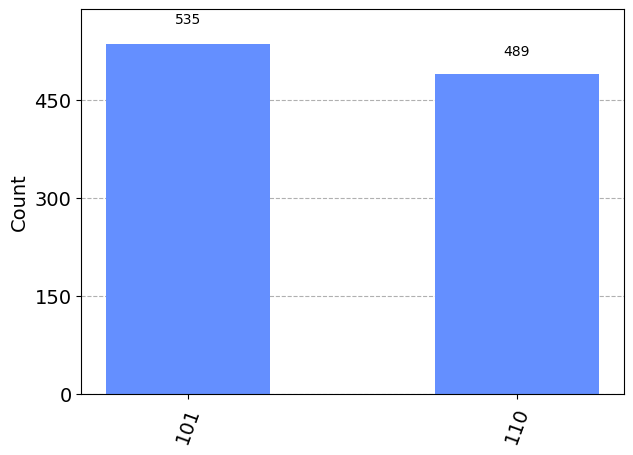

In [14]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots = 1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)